# XGBoost optimization

In this script, we:
- evaluate baselines,
- conduct a grid search for XGBoost to find optimal hyper-parameters,
- evaluate the model,
- evaluate features importance

To run this script, the following data files are needed:
- dt_final.xlsx (+)

Saved models:
- xgboost_tuned_weighted.model (+)

(attached: +, not attached: -)

In [1]:
# misc
import os
import re
import time
import ast
import warnings
import math
import copy
import matplotlib.pyplot as plt
from xgboost import plot_importance
import seaborn as sns

# data
import pandas as pd
import numpy as np
import csv

# ML
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn import metrics
import scikitplot as skplt
import xgboost 

In [2]:
os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
data = pd.read_excel('dt_final.xlsx')

## 1 Data preparation

In [3]:
# only features and label
dt = data[[
 'label4', 
 'glove_vec300_norm', 
 'tfidf_art', 
 'negative_conc',
 'positive_conc',
 'weak_subj',
 'strong_subj',
 'hyperbolic_terms',
 'attitude_markers',
 'kill_verbs',
 'bias_lexicon',
 'assertive_verbs',
 'factive_verbs',
 'report_verbs',
 'implicative_verbs',
 'hedges',
 'boosters',
 'affect ',
 'posemo ',
 'negemo ',
 'anx ',
 'anger ',
 'sad ',
 'social ',
 'family ',
 'friend ',
 'female ',
 'male ',
 'cogproc ',
 'insight ',
 'cause ',
 'discrep ',
 'tentat ',
 'certain ',
 'differ ',
 'percept ',
 'see ',
 'hear ',
 'feel ',
 'bio ',
 'body ',
 'health ',
 'sexual ',
 'ingest ',
 'drives ',
 'affiliation ',
 'achieve ',
 'power ',
 'reward ',
 'risk ',
 'focuspast ',
 'focuspresent ',
 'focusfuture ',
 'relativ ',
 'motion ',
 'space ',
 'time ',
 'work ',
 'leisure ',
 'home ',
 'money ',
 'relig ',
 'death ',
 'informal ',
 'swear ',
 'netspeak ',
 'assent ',
 'nonflu ',
 'filler ',
 'pos_ADJ',
 'pos_ADP',
 'pos_ADV',
 'pos_AUX',
 'pos_DET',
 'pos_INTJ',
 'pos_NOUN',
 'pos_PRON',
 'pos_PROPN',
 'pos_SCONJ',
 'pos_VERB',
 'pos_X',
 'dep_ROOT',
 'dep_acl',
 'dep_acomp',
 'dep_advcl',
 'dep_advmod',
 'dep_agent',
 'dep_amod',
 'dep_appos',
 'dep_attr',
 'dep_aux',
 'dep_auxpass',
 'dep_case',
 'dep_cc',
 'dep_ccomp',
 'dep_compound',
 'dep_conj',
 'dep_csubj',
 'dep_dative',
 'dep_dep',
 'dep_det',
 'dep_dobj',
 'dep_expl',
 'dep_intj',
 'dep_mark',
 'dep_meta',
 'dep_neg',
 'dep_nmod',
 'dep_npadvmod',
 'dep_nsubj',
 'dep_nsubjpass',
 'dep_nummod',
 'dep_oprd',
 'dep_parataxis',
 'dep_pcomp',
 'dep_pobj',
 'dep_poss',
 'dep_preconj',
 'dep_predet',
 'dep_prep',
 'dep_prt',
 'dep_punct',
 'dep_quantmod',
 'dep_relcl',
 'dep_xcomp',
 'ne_CARDINAL',
 'ne_DATE',
 'ne_EVENT',
 'ne_FAC',
 'ne_GPE',
 'ne_LANGUAGE',
 'ne_LAW',
 'ne_LOC',
 'ne_MONEY',
 'ne_NORP',
 'ne_ORDINAL',
 'ne_ORG',
 'ne_PERCENT',
 'ne_PERSON',
 'ne_PRODUCT',
 'ne_QUANTITY',
 'ne_TIME',
 'ne_WORK_OF_ART',
 'negative_conc_context',
 'positive_conc_context',
 'weak_subj_context',
 'strong_subj_context',
 'hyperbolic_terms_context',
 'attitude_markers_context',
 'kill_verbs_context',
 'bias_lexicon_context',
 'assertive_verbs_context',
 'factive_verbs_context',
 'report_verbs_context',
 'implicative_verbs_context',
 'hedges_context',
 'boosters_context',
 'affect _context',
 'posemo _context',
 'negemo _context',
 'anx _context',
 'anger _context',
 'sad _context',
 'social _context',
 'family _context',
 'friend _context',
 'female _context',
 'male _context',
 'cogproc _context',
 'insight _context',
 'cause _context',
 'discrep _context',
 'tentat _context',
 'certain _context',
 'differ _context',
 'percept _context',
 'see _context',
 'hear _context',
 'feel _context',
 'bio _context',
 'body _context',
 'health _context',
 'sexual _context',
 'ingest _context',
 'drives _context',
 'affiliation _context',
 'achieve _context',
 'power _context',
 'reward _context',
 'risk _context',
 'focuspast _context',
 'focuspresent _context',
 'focusfuture _context',
 'relativ _context',
 'motion _context',
 'space _context',
 'time _context',
 'work _context',
 'leisure _context',
 'home _context',
 'money _context',
 'relig _context',
 'death _context',
 'informal _context',
 'swear _context',
 'netspeak _context',
 'assent _context',
 'nonflu _context',
 'filler _context',
 'pos_ADJ_context',
 'pos_ADP_context',
 'pos_ADV_context',
 'pos_AUX_context',
 'pos_DET_context',
 'pos_INTJ_context',
 'pos_NOUN_context',
 'pos_PRON_context',
 'pos_PROPN_context',
 'pos_SCONJ_context',
 'pos_VERB_context',
 'pos_X_context',
 'dep_ROOT_context',
 'dep_acl_context',
 'dep_acomp_context',
 'dep_advcl_context',
 'dep_advmod_context',
 'dep_agent_context',
 'dep_amod_context',
 'dep_appos_context',
 'dep_attr_context',
 'dep_aux_context',
 'dep_auxpass_context',
 'dep_case_context',
 'dep_cc_context',
 'dep_ccomp_context',
 'dep_compound_context',
 'dep_conj_context',
 'dep_csubj_context',
 'dep_dative_context',
 'dep_dep_context',
 'dep_det_context',
 'dep_dobj_context',
 'dep_expl_context',
 'dep_intj_context',
 'dep_mark_context',
 'dep_meta_context',
 'dep_neg_context',
 'dep_nmod_context',
 'dep_npadvmod_context',
 'dep_nsubj_context',
 'dep_nsubjpass_context',
 'dep_nummod_context',
 'dep_oprd_context',
 'dep_parataxis_context',
 'dep_pcomp_context',
 'dep_pobj_context',
 'dep_poss_context',
 'dep_preconj_context',
 'dep_predet_context',
 'dep_prep_context',
 'dep_prt_context',
 'dep_punct_context',
 'dep_quantmod_context',
 'dep_relcl_context',
 'dep_xcomp_context',
 'ne_CARDINAL_context',
 'ne_DATE_context',
 'ne_EVENT_context',
 'ne_FAC_context',
 'ne_GPE_context',
 'ne_LAW_context',
 'ne_LOC_context',
 'ne_MONEY_context',
 'ne_NORP_context',
 'ne_ORDINAL_context',
 'ne_ORG_context',
 'ne_PERCENT_context',
 'ne_PERSON_context',
 'ne_PRODUCT_context',
 'ne_QUANTITY_context',
 'ne_TIME_context',
 'ne_WORK_OF_ART_context',
 'ne_LANGUAGE_context']]

In [4]:
print('Number of missing values:')
mis = (dt.isnull().sum()).to_frame()
for i, row in mis.iterrows():
    if row[0] > 0:
        print(i, row[0])

# Delete the rows with missing article text:
dt = dt.dropna(subset=['tfidf_art'])

Number of missing values:
tfidf_art 658


In [5]:
x = dt.drop(['label4'], 1)
y4 = dt[['label4']]

In [6]:
# train-test split
train_features, test_features, train_labels, test_labels = train_test_split(x, y4, 
                                                                            test_size = 0.10, random_state = 42)
train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            test_size = 0.10, random_state = 42)

In [7]:
feature_names = list(x.columns)

In [8]:
# matrix for XGBoost
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [9]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('Training Features for final model Shape:', train_features1.shape)
print('Training Labels for final model Shape:', train_labels1.shape)
print('Validation Features Shape:', val_features.shape)
print('Validation Labels Shape:', val_labels.shape)

Training Features Shape: (28022, 282)
Training Labels Shape: (28022, 1)
Testing Features Shape: (3114, 282)
Testing Labels Shape: (3114, 1)
Training Features for final model Shape: (25219, 282)
Training Labels for final model Shape: (25219, 1)
Validation Features Shape: (2803, 282)
Validation Labels Shape: (2803, 1)


## 2 Baselines

### B1: Random guesser

In [10]:
b1_pred = pd.Series(np.random.randint(2, size=len(test_features)))

In [11]:
print('Performance of b1, test:')
print('F1:', round(metrics.f1_score(test_labels,b1_pred),2))
print('Precision:', round(metrics.precision_score(test_labels,b1_pred),2))
print('Recall:', round(metrics.recall_score(test_labels,b1_pred),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b1_pred),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b1_pred),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(test_labels,b1_pred).transpose())

Performance of b1, test:
F1: 0.15
Precision: 0.09
Recall: 0.45
AUC: 0.47
Accuracy: 0.49
Confusion matrix:
 [[1379  165]
 [1433  137]]


### B2: Negative sentiment lexicon

In [20]:
b2_pred = test_features.negative_conc

In [21]:
print('Performance of b2, test:')
print('F1:', round(metrics.f1_score(test_labels,b2_pred),2))
print('Precision:', round(metrics.precision_score(test_labels,b2_pred),2))
print('Recall:', round(metrics.recall_score(test_labels,b2_pred),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b2_pred),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b2_pred),2))
print('Confusion matrix:\n', metrics.confusion_matrix(test_labels,b2_pred).transpose())

Performance of b2, test:
F1: 0.4
Precision: 0.35
Recall: 0.47
AUC: 0.69
Accuracy: 0.86
Confusion matrix:
 [[2550  160]
 [ 262  142]]


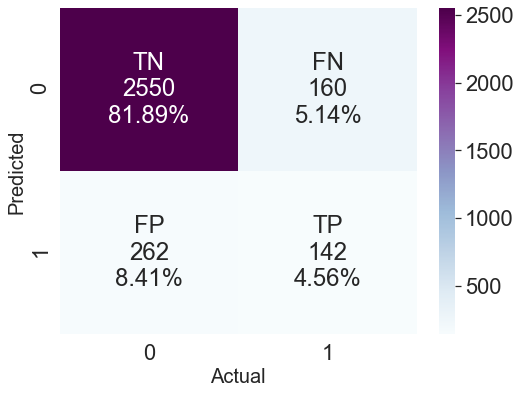

In [22]:
cf_matrix = metrics.confusion_matrix(test_labels,b2_pred)
TN = cf_matrix[0][0]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]
FP = cf_matrix[0][1]
fl = [TN, FN, FP, TP]
fig, ax = plt.subplots(figsize=(8,6))

sns.set(font_scale=2)
group_names = ['TN','FN','FP','TP']
group_counts = ["{0:0.0f}".format(value) for value in fl]
group_percentages = ["{0:.2%}".format(value) for value in
                     fl/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="BuPu")
plt.ylabel('Predicted', fontsize=20)
plt.xlabel('Actual', fontsize=20)
ax.set_ylim([0,2])
ax.invert_yaxis()

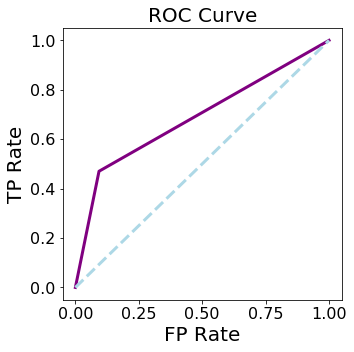

In [13]:
plt.rcParams['font.size'] = 16
plt.subplots(1, 1, figsize=(5,5))

rand_probs = [0 for _ in range(len(test_labels))]
rand_fpr, rand_tpr, thresholds = metrics.roc_curve(test_labels, rand_probs)

fpr, tpr, thresholds = metrics.roc_curve(test_labels, b2_pred,
                                         pos_label=1)
plt.plot(fpr, tpr, linewidth=3, color='purple')
plt.plot(rand_fpr, rand_tpr, linestyle='--', linewidth=3, color='lightblue')
plt.title("ROC Curve", fontsize=20)
plt.xlabel("FP Rate", fontsize=20)
plt.ylabel("TP Rate", fontsize=20)
plt.show()

### B3: Negative and positive sentiment lexicon

In [32]:
b3_pred = test_features.apply(lambda row: 1 if row.negative_conc==1 or row.positive_conc==1 else 0, axis=1)

In [33]:
print('Performance of b3, test:')
print('F1:', round(metrics.f1_score(test_labels,b3_pred),2))
print('Precision:', round(metrics.precision_score(test_labels,b3_pred),2))
print('Recall:', round(metrics.recall_score(test_labels,b3_pred),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b3_pred),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b3_pred),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(test_labels,b3_pred).transpose())

Performance of b3, test:
F1: 0.32
Precision: 0.22
Recall: 0.57
AUC: 0.68
Accuracy: 0.76
Confusion matrix:
 [[2209  129]
 [ 603  173]]


### B4: Semi-automated bias lexicon

In [35]:
b4_pred = test_features.bias_lexicon

In [36]:
print('Performance of b4, test:')
print('F1:', round(metrics.f1_score(test_labels,b4_pred),2))
print('Precision:', round(metrics.precision_score(test_labels,b4_pred),2))
print('Recall:', round(metrics.recall_score(test_labels,b4_pred),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,b4_pred),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,b4_pred),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(test_labels,b4_pred).transpose())

Performance of b4, test:
F1: 0.2
Precision: 0.62
Recall: 0.12
AUC: 0.56
Accuracy: 0.91
Confusion matrix:
 [[2790  266]
 [  22   36]]


## 3 XGBoost optimization

In [12]:
print('Biased words:',round(len(y4[y4['label4']==1])/len(y4)*100,0),'%')
print('Biased words:',round(len(y4[y4['label4']==0])/len(y4)*100,0),'%')

Biased words: 10.0 %
Biased words: 90.0 %


### 3.1 Hyper-parameters tuning

We don't train full gridsearch, instead, we train different mutually dependent hyper-parameters together:
- max_depth & min_child_weight
- subsample & colsample_bytree
- eta

In [12]:
scale_pos_weight = len(train_labels[train_labels['label4']==0])/len(train_labels[train_labels['label4']==1])
scale_pos_weight

9.471599402092675

In [138]:
params = {
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':"binary:logistic",
    'disable_default_eval_metric': 1,
    'seed': 42,
    'tree_method': 'hist',
    'scale_pos_weight': scale_pos_weight
}

num_boost_round = 999

In [20]:
def f1_eval(predt: np.ndarray, dtrain: xgboost.DMatrix):
    y = dtrain.get_label()
    predt_binary = np.where(predt > 0.5, 1, 0)
    return "F1_score", metrics.f1_score(y_true=y, y_pred=predt_binary)

In [140]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,13,1)
    for min_child_weight in range(4,41,2)
]

In [141]:
start_time = time.time()
max_f1 = float(0)
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    cv_results = xgboost.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        feval=f1_eval,
        early_stopping_rounds = 10,
        maximize=True)
    
    mean_f1 = cv_results['test-F1_score-mean'].max()
    boost_rounds = cv_results['test-F1_score-mean'].argmax()
    print("\tF1 {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, F1: {}".format(best_params[0], best_params[1], max_f1))
end_time = time.time()
print('time:', end_time - start_time)

CV with max_depth=6, min_child_weight=4


/Users/ladarudnitckaia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 0.4508166 for 20 rounds
CV with max_depth=6, min_child_weight=6
	F1 0.442002 for 11 rounds
CV with max_depth=6, min_child_weight=8
	F1 0.44223219999999996 for 8 rounds
CV with max_depth=6, min_child_weight=10
	F1 0.44836159999999997 for 29 rounds
CV with max_depth=6, min_child_weight=12
	F1 0.4515848 for 24 rounds
CV with max_depth=6, min_child_weight=14
	F1 0.4486283999999999 for 33 rounds
CV with max_depth=6, min_child_weight=16
	F1 0.444728 for 11 rounds
CV with max_depth=6, min_child_weight=18
	F1 0.45391879999999996 for 31 rounds
CV with max_depth=6, min_child_weight=20
	F1 0.4468586 for 41 rounds
CV with max_depth=6, min_child_weight=22
	F1 0.4502764 for 28 rounds
CV with max_depth=6, min_child_weight=24
	F1 0.44844280000000003 for 26 rounds
CV with max_depth=6, min_child_weight=26
	F1 0.4455552 for 47 rounds
CV with max_depth=6, min_child_weight=28
	F1 0.4472534 for 15 rounds
CV with max_depth=6, min_child_weight=30
	F1 0.4514004 for 47 rounds
CV with max_depth=6, min_child_

	F1 0.44354459999999996 for 11 rounds
CV with max_depth=11, min_child_weight=38
	F1 0.4481994 for 22 rounds
CV with max_depth=11, min_child_weight=40
	F1 0.4528347999999999 for 42 rounds
CV with max_depth=12, min_child_weight=4
	F1 0.44315859999999996 for 16 rounds
CV with max_depth=12, min_child_weight=6
	F1 0.4408578 for 17 rounds
CV with max_depth=12, min_child_weight=8
	F1 0.4398166 for 10 rounds
CV with max_depth=12, min_child_weight=10
	F1 0.44990600000000003 for 27 rounds
CV with max_depth=12, min_child_weight=12
	F1 0.4452324 for 15 rounds
CV with max_depth=12, min_child_weight=14
	F1 0.445338 for 23 rounds
CV with max_depth=12, min_child_weight=16
	F1 0.45230879999999996 for 18 rounds
CV with max_depth=12, min_child_weight=18
	F1 0.449733 for 27 rounds
CV with max_depth=12, min_child_weight=20
	F1 0.45008739999999997 for 32 rounds
CV with max_depth=12, min_child_weight=22
	F1 0.4496728 for 25 rounds
CV with max_depth=12, min_child_weight=24
	F1 0.4492176 for 43 rounds
CV with 

In [142]:
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]

In [144]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(6,11,2)]
    for colsample in [i/10. for i in range(4,11,2)]
]

In [145]:
start_time = time.time()
max_f1 = float(0)
best_params = None

for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    
    cv_results = xgboost.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        feval=f1_eval,
        early_stopping_rounds = 10,
        maximize=True)
    
    mean_f1 = cv_results['test-F1_score-mean'].max()
    boost_rounds = cv_results['test-F1_score-mean'].argmax()
    print("\tF1 {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample,colsample)
print("Best params: {}, {}, F1: {}".format(best_params[0], best_params[1], max_f1))
end_time = time.time()
print('time:', end_time - start_time)

CV with subsample=1.0, colsample=1.0


/Users/ladarudnitckaia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 0.45391879999999996 for 31 rounds
CV with subsample=1.0, colsample=0.8
	F1 0.45007100000000005 for 28 rounds
CV with subsample=1.0, colsample=0.6
	F1 0.4448532 for 10 rounds
CV with subsample=1.0, colsample=0.4
	F1 0.4435784 for 18 rounds
CV with subsample=0.8, colsample=1.0
	F1 0.44194500000000003 for 22 rounds
CV with subsample=0.8, colsample=0.8
	F1 0.44323180000000006 for 43 rounds
CV with subsample=0.8, colsample=0.6
	F1 0.44284560000000006 for 21 rounds
CV with subsample=0.8, colsample=0.4
	F1 0.439961 for 20 rounds
CV with subsample=0.6, colsample=1.0
	F1 0.43738780000000005 for 17 rounds
CV with subsample=0.6, colsample=0.8
	F1 0.4360706 for 9 rounds
CV with subsample=0.6, colsample=0.6
	F1 0.4362106 for 4 rounds
CV with subsample=0.6, colsample=0.4
	F1 0.44315859999999996 for 33 rounds
Best params: 1.0, 1.0, F1: 0.45391879999999996
time: 95.46406197547913


In [146]:
params['subsample'] = best_params[0]
params['colsample_bytree'] = best_params[1]

In [148]:
start_time = time.time()
max_f1 = float(0)
best_params = None

for eta in [0.3, 0.2, 0.1, 0.01, 0.005]:
    print("CV with eta={}".format(eta))

    params['eta'] = eta

    cv_results = xgboost.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            feval=f1_eval,
            early_stopping_rounds = 10,
            maximize=True)

    mean_f1 = cv_results['test-F1_score-mean'].max()
    boost_rounds = cv_results['test-F1_score-mean'].argmax()
    print("\tF1 {} for {} rounds\n".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta
print("Best params: {}, F1: {}".format(best_params, max_f1))
end_time = time.time()
print('time:', end_time - start_time)

CV with eta=0.3


/Users/ladarudnitckaia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


	F1 0.45391879999999996 for 31 rounds

CV with eta=0.2
	F1 0.4579406 for 63 rounds

CV with eta=0.1
	F1 0.45150100000000004 for 60 rounds

CV with eta=0.01
	F1 0.0 for 0 rounds

CV with eta=0.005
	F1 0.0 for 0 rounds

Best params: 0.2, F1: 0.4579406
time: 40.996057987213135


In [149]:
params['eta'] = best_params

### 3.2 Final model training and evaluation

In [21]:
# optimized hyper-parameters
params = {'max_depth': 6,
 'min_child_weight': 18,
 'eta': 0.2,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'binary:logistic',
 'disable_default_eval_metric': 1,
 'seed': 42,
 'tree_method': 'hist',
 'scale_pos_weight': 9.471599402092675}
num_boost_round=999

In [22]:
xgboost_tuned_weighted = xgboost.train(
    params,
    dtrain1,
    num_boost_round=num_boost_round,
    evals=[(dtrain1, 'dtrain'), (dval, 'dval')],
    feval=f1_eval,
    early_stopping_rounds = 10,
    maximize=True)

[0]	dtrain-F1_score:0.00000	dval-F1_score:0.00000
Multiple eval metrics have been passed: 'dval-F1_score' will be used for early stopping.

Will train until dval-F1_score hasn't improved in 10 rounds.
[1]	dtrain-F1_score:0.38939	dval-F1_score:0.39400
[2]	dtrain-F1_score:0.43131	dval-F1_score:0.43575
[3]	dtrain-F1_score:0.44414	dval-F1_score:0.45439
[4]	dtrain-F1_score:0.44074	dval-F1_score:0.44839
[5]	dtrain-F1_score:0.45089	dval-F1_score:0.45981
[6]	dtrain-F1_score:0.44791	dval-F1_score:0.45426
[7]	dtrain-F1_score:0.45034	dval-F1_score:0.45814
[8]	dtrain-F1_score:0.45481	dval-F1_score:0.47096
[9]	dtrain-F1_score:0.45936	dval-F1_score:0.47003
[10]	dtrain-F1_score:0.45883	dval-F1_score:0.47041
[11]	dtrain-F1_score:0.46258	dval-F1_score:0.47261
[12]	dtrain-F1_score:0.46623	dval-F1_score:0.47664
[13]	dtrain-F1_score:0.47025	dval-F1_score:0.48137
[14]	dtrain-F1_score:0.47157	dval-F1_score:0.47531
[15]	dtrain-F1_score:0.47772	dval-F1_score:0.48159
[16]	dtrain-F1_score:0.47668	dval-F1_score:

In [10]:
os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
# xgboost_tuned_weighted.save_model("xgboost_tuned_weighted.model")
xgboost_tuned_weighted = xgboost.Booster()
xgboost_tuned_weighted.load_model("xgboost_tuned_weighted.model")

In [11]:
xgboost_tuned_weighted_predt = np.where(xgboost_tuned_weighted.predict(dtest) > 0.5, 1, 0)
print('Performance of xgboost_tuned_weighted, test:')
print('F1:', round(metrics.f1_score(dtest.get_label(),xgboost_tuned_weighted_predt),2))
print('Precision:', round(metrics.precision_score(dtest.get_label(), xgboost_tuned_weighted_predt),2))
print('Recall:', round(metrics.recall_score(dtest.get_label(), xgboost_tuned_weighted_predt),2))
print('AUC:', round(metrics.roc_auc_score(dtest.get_label(), xgboost_tuned_weighted_predt),2))
print('Accuracy:', round(metrics.accuracy_score(dtest.get_label(), xgboost_tuned_weighted_predt),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(dtest.get_label(), xgboost_tuned_weighted_predt).transpose())

Performance of xgboost_tuned_weighted, test:
F1: 0.43
Precision: 0.29
Recall: 0.77
AUC: 0.79
Accuracy: 0.8
Confusion matrix:
 [[2255   70]
 [ 557  232]]


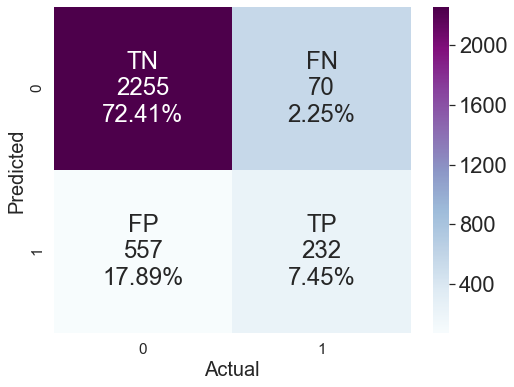

In [19]:
cf_matrix = metrics.confusion_matrix(dtest.get_label(), xgboost_tuned_weighted_predt)
TN = cf_matrix[0][0]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]
FP = cf_matrix[0][1]
fl = [TN, FN, FP, TP]
fig, ax = plt.subplots(figsize=(8,6))

sns.set(font_scale=2)
group_names = ['TN','FN','FP','TP']
group_counts = ["{0:0.0f}".format(value) for value in fl]
group_percentages = ["{0:.2%}".format(value) for value in
                     fl/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="BuPu")
plt.ylabel('Predicted', fontsize=20)
plt.xlabel('Actual', fontsize=20)
ax.set_ylim([0,2])
ax.invert_yaxis()

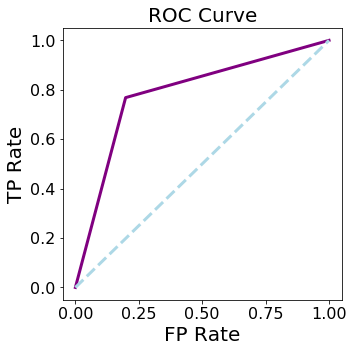

In [25]:
plt.rcParams['font.size'] = 16
plt.subplots(1, 1, figsize=(5,5))

rand_probs = [0 for _ in range(len(dtest.get_label()))]
rand_fpr, rand_tpr, thresholds = metrics.roc_curve(dtest.get_label(), rand_probs)

fpr, tpr, thresholds = metrics.roc_curve(dtest.get_label(), xgboost_tuned_weighted_predt,
                                         pos_label=1)
plt.plot(fpr, tpr, linewidth=3, color='purple')
plt.plot(rand_fpr, rand_tpr, linestyle='--', linewidth=3, color='lightblue')
plt.title("ROC Curve", fontsize=20)
plt.xlabel("FP Rate", fontsize=20)
plt.ylabel("TP Rate", fontsize=20)
plt.show()

In [17]:
# feat_imp = pd.DataFrame.from_dict(xgboost_tuned_weighted.get_score(importance_type='gain'), orient='index')
# feat_imp = feat_imp.reset_index()
# feat_imp = feat_imp.rename(columns={"index": "feature", 0: "score"})
# feat_imp = feat_imp.sort_values(by=['score'], ascending=False)

# feat_imp['name'] = None
# for i, feat in enumerate(feature_names):
#     #print(i, feat)
#     f = 'f'+str(i)
#     feat_imp['name'] = feat_imp.apply(lambda row: feat if row['feature']==f else row['name'], axis=1)
    
# feat_imp

In [13]:
feat_imp = pd.DataFrame.from_dict(xgboost_tuned_weighted.get_score(importance_type='gain'), orient='index')
feat_imp = feat_imp.reset_index()
feat_imp = feat_imp.rename(columns={"index": "feature", 0: "score"})
feat_imp = feat_imp.sort_values(by=['score'], ascending=False)
    
feat_imp

,feature,score
0,negative_conc,1194.802702
1,pos_PROPN,469.829776
2,positive_conc,143.969471
4,work,134.593434
26,boosters,124.563202
...,...,...
87,cogproc _context,7.748619
47,anger _context,6.290741
69,dep_advmod_context,5.473555
59,dep_pcomp,5.329407


/Users/ladarudnitckaia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


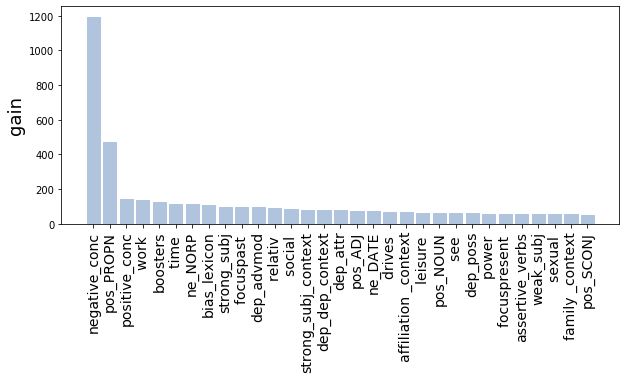

In [16]:
feat_imp_ = feat_imp[feat_imp['score']>=50]

fig, ax = plt.subplots(1, 1, figsize=(10,4))

xticklabels = feat_imp_.feature

ax.bar(np.arange(len(feat_imp_.feature)), feat_imp_.score,
        align='center', color='lightsteelblue', edgecolor='lightsteelblue')
ax.set_xticks(np.arange(len(feat_imp_.feature)))
ax.set_xticklabels(xticklabels, rotation=90, fontsize=14)
#ax.set_title('Features importance', fontsize=20)
ax.set_ylabel('gain', fontsize=18)

fig.show()

In [25]:
# features that have 0-importance
zer_imp = list(set(feature_names) - set(feat_imp.feature))
zer_imp

['nonflu _context',
 'dep_det',
 'ne_PRODUCT_context',
 'hyperbolic_terms_context',
 'differ ',
 'certain ',
 'percept _context',
 'dep_dative',
 'dep_preconj_context',
 'female ',
 'male ',
 'dep_punct',
 'sad _context',
 'dep_xcomp_context',
 'dep_nummod',
 'dep_parataxis',
 'ne_CARDINAL',
 'netspeak _context',
 'netspeak ',
 'swear ',
 'focuspast _context',
 'dep_case_context',
 'pos_ADP',
 'dep_predet_context',
 'health ',
 'dep_intj',
 'ne_CARDINAL_context',
 'ne_TIME',
 'dep_appos',
 'dep_oprd_context',
 'anx ',
 'pos_DET',
 'ne_EVENT',
 'dep_prt',
 'ingest ',
 'pos_X',
 'ne_ORDINAL_context',
 'dep_case',
 'anx _context',
 'focusfuture ',
 'kill_verbs',
 'dep_csubj_context',
 'informal _context',
 'dep_ccomp',
 'pos_PRON',
 'ne_PERCENT',
 'ne_PERSON',
 'factive_verbs_context',
 'achieve ',
 'pos_AUX',
 'dep_csubj',
 'ne_GPE',
 'attitude_markers_context',
 'ne_QUANTITY_context',
 'implicative_verbs',
 'dep_appos_context',
 'dep_quantmod',
 'pos_INTJ_context',
 'ne_PRODUCT',
 'ne_L

In [26]:
list(feat_imp.feature)

['negative_conc',
 'pos_PROPN',
 'positive_conc',
 'work ',
 'boosters',
 'time ',
 'ne_NORP',
 'bias_lexicon',
 'strong_subj',
 'focuspast ',
 'dep_advmod',
 'relativ ',
 'social ',
 'strong_subj_context',
 'dep_dep_context',
 'dep_attr',
 'pos_ADJ',
 'ne_DATE',
 'drives ',
 'affiliation _context',
 'leisure ',
 'pos_NOUN',
 'see ',
 'dep_poss',
 'power ',
 'focuspresent ',
 'assertive_verbs',
 'weak_subj',
 'sexual ',
 'family _context',
 'pos_SCONJ',
 'dep_prep',
 'dep_ROOT',
 'bio _context',
 'dep_attr_context',
 'certain _context',
 'male _context',
 'boosters_context',
 'female _context',
 'bio ',
 'affiliation ',
 'ne_EVENT_context',
 'cogproc ',
 'dep_dep',
 'ne_DATE_context',
 'risk _context',
 'reward _context',
 'space ',
 'pos_ADV',
 'dep_amod',
 'posemo ',
 'achieve _context',
 'power _context',
 'dep_nmod_context',
 'relig _context',
 'bias_lexicon_context',
 'money ',
 'dep_conj_context',
 'dep_poss_context',
 'space _context',
 'tentat ',
 'dep_nsubj',
 'report_verbs',


### 3.3 Individual errors analysis

In [ ]:
xgboost_tuned_weighted_predt = np.where(xgboost_tuned_weighted.predict(dtest) > 0.5, 1, 0)
test_labels['pred'] = xgboost_tuned_weighted_predt

err_analysis = pd.merge(pd.concat([test_features, test_labels], axis=1),
         data[['sentence','text','lemma','biased_words4']],
         how='left', 
         left_index=True, right_index=True)

err_analysis['error_type'] = err_analysis.apply(lambda row: 'TP' if row.label4==1 and row.pred==1 else
                                                            'FN' if row.label4==1 and row.pred==0 else
                                                            'FP' if row.label4==0 and row.pred==1 else
                                                            'TN', axis=1)

TP = err_analysis[err_analysis['error_type']=='TP']
FN = err_analysis[err_analysis['error_type']=='FN']
FP = err_analysis[err_analysis['error_type']=='FP']

from random import sample   
for word in sample(list(TP.text),50):
    print(word)

In [ ]:
# os.chdir('/Users/ladarudnitckaia/Desktop/Master Thesis/9. ML')
# TP.to_excel('TP.xlsx')
# FN.to_excel('FN.xlsx')
# FP.to_excel('FP.xlsx')